<h1> <center> <font color="green"> Logistic Regression </center></h2>

<center><img src="pics/logistic.jpeg" width=800 height=400></center>

<h2> <font color="blue"> Pros </h2>

1. Easy to undestnad. 
2. Can model linear type of relationship very well.
3. Do not has <b>assumptions</b> like "linear" regression.

<h2><font color = "red"> Cons </h2>

<h2> <font color="green"> How it Works !! </h2>

<h2> Implementation </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
credit = pd.read_csv('/Users/bt/Documents/GITHUB/creditcard.csv')
credit.drop('Time', axis=1, inplace=True)

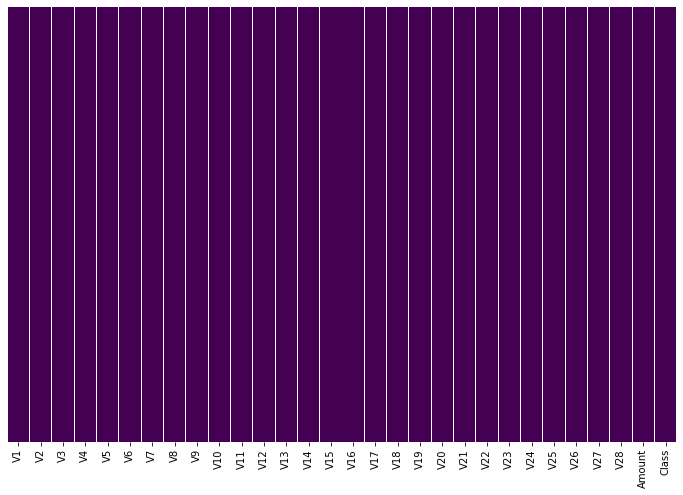

In [3]:
# Check missing data
plt.figure(figsize=(12,8))
sns.heatmap(credit.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

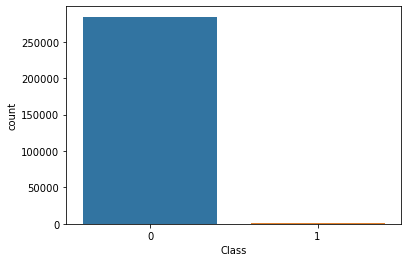

In [4]:
# Highly unbalanced dataset
sns.countplot(x='Class', data=credit)
plt.show()

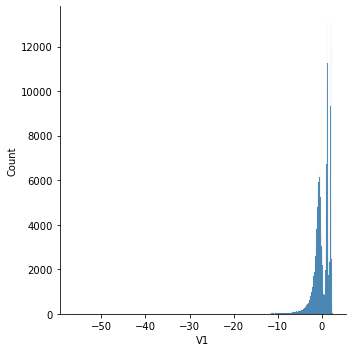

In [5]:
# Seems like very skewed distribution
sns.displot(credit['V1'])

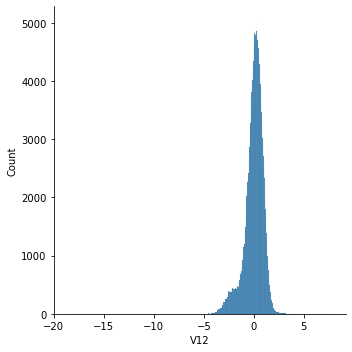

In [6]:
sns.displot(credit['V12'])

<AxesSubplot:>

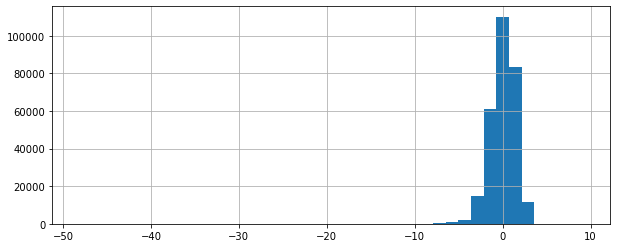

In [7]:
credit['V3'].hist(bins=40,figsize=(10,4))

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
X = credit.drop('Class',axis=1)
y = credit['Class'].ravel()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3,shuffle=True)

In [16]:
# Scale the variables

min_max = MinMaxScaler()

X_train = min_max.fit_transform(X_train)

In [17]:
X_test = min_max.transform(X_test)

In [18]:
logmodel = LogisticRegression()

In [19]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [20]:
predictions = logmodel.predict(X_test)

In [21]:
from sklearn.metrics import recall_score, precision_score, classification_report, accuracy_score, confusion_matrix

In [22]:
print("Recall Score : ", recall_score(y_test,predictions))
print("Precision Score : ", precision_score(y_test,predictions))
print("Accuracy Score : ", accuracy_score(y_test,predictions))

Recall Score :  0.5540540540540541
Precision Score :  0.8282828282828283
Accuracy Score :  0.9990285921608558


In [23]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [24]:
lr = LogisticRegression()

pprint(lr.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [31]:
C = np.logspace(-4,4,10)
penalty = ['l1','l2','elasticnet']
tol = [0.001,0.01]
solver = ['sag','saga']

In [32]:
params = {
    'C' : C,
    'penalty' : penalty,
    'tol' : tol,
    'solver' : solver
}

In [33]:
params

{'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
        3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
        1.29154967e+03, 1.00000000e+04]),
 'penalty': ['l1', 'l2', 'elasticnet'],
 'tol': [0.001, 0.01],
 'solver': ['sag', 'saga']}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
LR = LogisticRegression()

In [37]:
lr_grid_Search = GridSearchCV(LR,param_grid=params,cv=10,n_jobs=-1,scoring="f1")

In [ ]:
lr_grid_Search.fit(X_train,y_train)